In [2]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D

from keras.optimizers import SGD, RMSprop
from keras.utils import np_utils, generic_utils
from keras.callbacks import EarlyStopping, ModelCheckpoint

#import theano
import os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn import preprocessing

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# image specification
img_rows,img_cols = 112,112
img_depth = 16
X_tr = []

## import thumbup

In [4]:
from tqdm import tqdm
train_folder_path = os.path.join(os.getcwd(), "action_data/Hand/thumbup")
train_folder_list = sorted(os.listdir(train_folder_path))

for dicname in tqdm(train_folder_list):
    list_path = os.path.join(train_folder_path, dicname)
    frames = []
    i=0
    for img in sorted(os.listdir(list_path)):
        if i < img_depth:
            img_path = os.path.join(list_path, img)
            frame = cv2.imread(os.path.join(list_path, img))
            frame = cv2.resize(frame,(img_rows,img_cols))
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(gray)
            i = i+1
        else:
            break

    input=np.array(frames)
    #print (input.shape)
    ipt = np.rollaxis(np.rollaxis(input,2,0),2,0)
    #ipt=np.rollaxis(ipt,3,0)
    #print (ipt.shape)
    #print("__")
    X_tr.append(ipt)
    
print (ipt.shape)
num_samples = len(X_tr)
print(num_samples)

100%|██████████| 116/116 [01:26<00:00,  1.62it/s]

(112, 112, 16)
116


## import stop

In [5]:
train_folder_path = os.path.join(os.getcwd(), "action_data/Hand/stop")
train_folder_list = sorted(os.listdir(train_folder_path))

for dicname in tqdm(train_folder_list):
    list_path = os.path.join(train_folder_path, dicname)
    frames = []
    i=0
    for img in sorted(os.listdir(list_path)):
        if i < img_depth:
            img_path = os.path.join(list_path, img)
            frame = cv2.imread(os.path.join(list_path, img))
            frame = cv2.resize(frame,(img_rows,img_cols))
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(gray)
            i = i+1
        else:
            break

    input=np.array(frames)
    #print (input.shape)
    ipt = np.rollaxis(np.rollaxis(input,2,0),2,0)
    #ipt=np.rollaxis(ipt,3,0)
    #print (ipt.shape)
    #print("__")
    X_tr.append(ipt)
    
print (ipt.shape)
num_samples = len(X_tr)
print(num_samples)

100%|██████████| 198/198 [02:12<00:00,  4.14it/s]

(112, 112, 16)
314


## import clockwise

In [6]:
train_folder_path = os.path.join(os.getcwd(), "action_data/Hand/clockwise")
train_folder_list = sorted(os.listdir(train_folder_path))

for dicname in tqdm(train_folder_list):
    list_path = os.path.join(train_folder_path, dicname)
    frames = []
    i=0
    for img in sorted(os.listdir(list_path)):
        if i < img_depth:
            img_path = os.path.join(list_path, img)
            frame = cv2.imread(os.path.join(list_path, img))
            frame = cv2.resize(frame,(img_rows,img_cols))
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(gray)
            i = i+1
        else:
            break

    input=np.array(frames)
    #print (input.shape)
    ipt = np.rollaxis(np.rollaxis(input,2,0),2,0)
    #ipt=np.rollaxis(ipt,3,0)
    #print (ipt.shape)
    #print("__")
    X_tr.append(ipt)
    
print (ipt.shape)
num_samples = len(X_tr)
print(num_samples)

100%|██████████| 116/116 [01:19<00:00,  1.11it/s]

(112, 112, 16)
430


## import counterclockwise

In [7]:
train_folder_path = os.path.join(os.getcwd(), "action_data/Hand/counterclockwise")
train_folder_list = sorted(os.listdir(train_folder_path))

for dicname in tqdm(train_folder_list):
    list_path = os.path.join(train_folder_path, dicname)
    frames = []
    i=0
    for img in sorted(os.listdir(list_path)):
        if i < img_depth:
            img_path = os.path.join(list_path, img)
            frame = cv2.imread(os.path.join(list_path, img))
            frame = cv2.resize(frame,(img_rows,img_cols))
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(gray)
            i = i+1
        else:
            break

    input=np.array(frames)
    #print (input.shape)
    ipt = np.rollaxis(np.rollaxis(input,2,0),2,0)
    #ipt=np.rollaxis(ipt,3,0)
    #print (ipt.shape)
    #print("__")
    X_tr.append(ipt)
    
print (ipt.shape)
num_samples = len(X_tr)
print(num_samples)

100%|██████████| 124/124 [01:20<00:00,  1.01it/s]

(112, 112, 16)
554


## import updown

In [8]:
train_folder_path = os.path.join(os.getcwd(), "action_data/Hand/UpDown")
train_folder_list = sorted(os.listdir(train_folder_path))

for dicname in tqdm(train_folder_list):
    list_path = os.path.join(train_folder_path, dicname)
    frames = []
    i=0
    for img in sorted(os.listdir(list_path)):
        if i < img_depth:
            img_path = os.path.join(list_path, img)
            frame = cv2.imread(os.path.join(list_path, img))
            frame = cv2.resize(frame,(img_rows,img_cols))
            #gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(gray)
            i = i+1
        else:
            break

    input=np.array(frames)
    #print (input.shape)
    ipt = np.rollaxis(np.rollaxis(input,2,0),2,0)
    #ipt=np.rollaxis(ipt,3,0)
    #print (ipt.shape)
    #print("__")
    X_tr.append(ipt)
    
print (ipt.shape)
num_samples = len(X_tr)
print(num_samples)

100%|██████████| 187/187 [01:37<00:00,  2.27it/s]

(112, 112, 16)
741


In [9]:
X_tr_array = np.array(X_tr)   # convert the frames read into array

num_samples = len(X_tr_array) 
print (num_samples)

741


## label DATA

In [10]:
label=np.ones((num_samples,),dtype = int)
label[0:116]= 0                   #thumbup
label[117:314] = 1                #stop
label[315:430] = 2                #clockwise
label[431:554] = 3                #counterclockwise
label[555:741]= 4                 #updown

train_data = [X_tr_array,label]

(X_train, y_train) = (train_data[0],train_data[1])
print('X_Train shape:', X_train.shape)

X_Train shape: (741, 112, 112, 16)


In [11]:
train_set = np.zeros((num_samples, 1, img_rows,img_cols,img_depth))
#train_set = X_train
for h in range(num_samples):
    train_set[h][0][:][:][:][:]=X_train[h,:,:,:]

In [12]:
#patch_size = 16    # img_depth or number of frames used for each video

print(X_train.shape,"X_train shapes")
print(train_set.shape, 'train samples')

(741, 112, 112, 16) X_train shapes
(741, 1, 112, 112, 16) train samples


## CNN Training parameters

In [13]:
nb_classes = 5

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)

'''
# Pre-processing
train_set = train_set.astype('float32')
train_set -= np.mean(train_set)
train_set /= np.max(train_set)
'''

"\n# Pre-processing\ntrain_set = train_set.astype('float32')\ntrain_set -= np.mean(train_set)\ntrain_set /= np.max(train_set)\n"

# Define Model

## Model_1

In [41]:
from keras.layers import Dense,Dropout,Conv3D,Input,MaxPool3D,Flatten,Activation
from keras.regularizers import l2
from keras.models import Model
from keras.optimizers import Adam, rmsprop
import keras

input_shape = (1,112,112,16) ##channel first ##channel,spatial_dim1, spatial_dim2, spatial_dim3,
weight_decay = 0.005
nb_classes = 5

model = Sequential()

model.add(Conv3D(64,(3,3,3),strides=(1,1,1), input_shape= input_shape, name='conv1', padding='same',data_format="channels_first", activation='relu'))
model.add(MaxPool3D((2,2,1),strides=(2,2,1), name='pool1',padding='same',data_format="channels_first"))

model.add(Conv3D(128,(3,3,3),strides=(1,1,1), name='conv2',padding='same'
                 ,data_format="channels_first",activation='relu'))
model.add(MaxPool3D((2,2,2),strides=(2,2,2), name='pool2',padding='same',data_format="channels_first"))

model.add(Conv3D(128,(3,3,3),strides=(1,1,1), name='conv3',padding='same'
                 ,data_format="channels_first",activation='relu'))
model.add(MaxPool3D((2,2,2),strides=(2,2,2), name='pool3',padding='same',data_format="channels_first"))

model.add(Conv3D(256,(3,3,3),strides=(1,1,1), name='conv4',padding='same'
                 ,data_format="channels_first",activation='relu'))
model.add(MaxPool3D((2,2,2),strides=(2,2,2), name='pool4',padding='same',data_format="channels_first"))

model.add(Conv3D(256,(3,3,3),strides=(1,1,1), name='conv5',padding='same'
                 ,data_format="channels_first",activation='relu'))
model.add(MaxPool3D((2,2,2),strides=(2,2,2), name='pool5',padding='same',data_format="channels_first"))


#fully connected layer
model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2048,activation='relu',kernel_initializer='normal'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes,activation='softmax',kernel_regularizer=l2(weight_decay)))

print(model.summary())
opt = keras.optimizers.Adam(lr=0.001)
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt ,metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv3D)               (None, 64, 112, 112, 16)  1792      
_________________________________________________________________
pool1 (MaxPooling3D)         (None, 64, 56, 56, 16)    0         
_________________________________________________________________
conv2 (Conv3D)               (None, 128, 56, 56, 16)   221312    
_________________________________________________________________
pool2 (MaxPooling3D)         (None, 128, 28, 28, 8)    0         
_________________________________________________________________
conv3 (Conv3D)               (None, 128, 28, 28, 8)    442496    
_________________________________________________________________
pool3 (MaxPooling3D)         (None, 128, 14, 14, 4)    0         
_________________________________________________________________
conv4 (Conv3D)               (None, 256, 14, 14, 4)    884992    
__________

## split data

In [42]:
X_train_new, X_val_new, y_train_new,y_val_new =  train_test_split(train_set, Y_train, test_size=0.2, random_state=4)

In [43]:
X_train_new = X_train_new.astype('float32')
X_train_new -= np.mean(X_train_new)
X_train_new /= np.max(X_train_new)

X_val_new = X_val_new.astype('float32')
X_val_new -= np.mean(X_val_new)
X_val_new /= np.max(X_val_new)

In [44]:
batch_size = 20
nb_epoch = 100

# Use ModelCheckpoint to save model and weights
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'C3D_model_test3_gray.h5'

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
# checkpoint
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1)
# earlystop
earlystop = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

hist = model.fit(X_train_new, y_train_new, 
                 validation_data=(X_val_new,y_val_new),
                 batch_size=batch_size,
                 epochs = nb_epoch, 
                 shuffle=True, 
                 callbacks=[checkpoint, earlystop])

Train on 592 samples, validate on 149 samples
Epoch 1/100
592/592 [==============================] - 12s 20ms/step - loss: 1.6630 - acc: 0.2635 - val_loss: 1.5896 - val_acc: 0.2953

Epoch 00001: val_loss improved from inf to 1.58959, saving model to /home/jovyan/project/saved_models/C3D_model_test3_gray.h5
Epoch 2/100
592/592 [==============================] - 11s 18ms/step - loss: 1.4939 - acc: 0.2770 - val_loss: 1.3115 - val_acc: 0.4161

Epoch 00002: val_loss improved from 1.58959 to 1.31149, saving model to /home/jovyan/project/saved_models/C3D_model_test3_gray.h5
Epoch 3/100
592/592 [==============================] - 11s 18ms/step - loss: 1.1555 - acc: 0.4578 - val_loss: 0.9649 - val_acc: 0.5034

Epoch 00003: val_loss improved from 1.31149 to 0.96494, saving model to /home/jovyan/project/saved_models/C3D_model_test3_gray.h5
Epoch 4/100
592/592 [==============================] - 11s 18ms/step - loss: 0.9701 - acc: 0.5743 - val_loss: 0.9010 - val_acc: 0.5302

Epoch 00004: val_loss im

In [45]:
# loading our save model
print("Loading trained model")
model = load_model(model_path)

Loading trained model


In [46]:
score = model.evaluate(X_val_new, y_val_new, batch_size=batch_size)
print('Test score:', score[0])
print('Test accuracy:', score[1]) 

149/149 [==============================] - 1s 7ms/step
Test score: 0.6387273387220882
Test accuracy: 0.6979865791813639


['seaborn-notebook', 'classic', 'seaborn-pastel', 'seaborn-white', 'seaborn-talk', 'bmh', 'seaborn', 'Solarize_Light2', 'seaborn-bright', 'seaborn-ticks', 'seaborn-paper', 'seaborn-muted', 'seaborn-darkgrid', 'fivethirtyeight', 'seaborn-dark-palette', 'seaborn-dark', 'grayscale', 'dark_background', 'seaborn-colorblind', 'seaborn-deep', '_classic_test', 'tableau-colorblind10', 'ggplot', 'seaborn-whitegrid', 'seaborn-poster', 'fast']
['seaborn-notebook', 'classic', 'seaborn-pastel', 'seaborn-white', 'seaborn-talk', 'bmh', 'seaborn', 'Solarize_Light2', 'seaborn-bright', 'seaborn-ticks', 'seaborn-paper', 'seaborn-muted', 'seaborn-darkgrid', 'fivethirtyeight', 'seaborn-dark-palette', 'seaborn-dark', 'grayscale', 'dark_background', 'seaborn-colorblind', 'seaborn-deep', '_classic_test', 'tableau-colorblind10', 'ggplot', 'seaborn-whitegrid', 'seaborn-poster', 'fast']


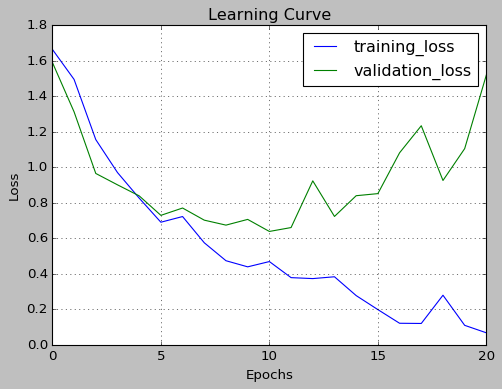

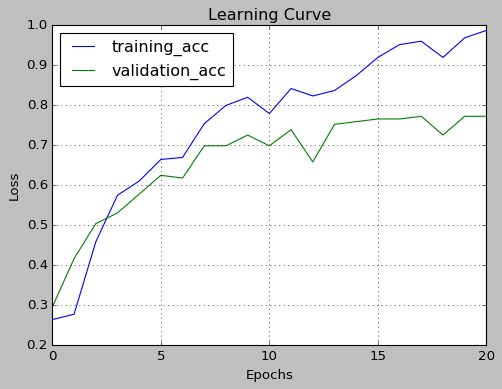

In [47]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']

plt.figure(1,figsize=(7,5))
plt.plot(train_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.title("Learning Curve")
plt.legend(loc='best')
print (plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(train_acc, label="training_acc")
plt.plot(val_acc, label="validation_acc")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.title("Learning Curve")
plt.legend(loc='best')
print (plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])


In [48]:
import itertools
def confusion_matrix_plot(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [49]:
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

In [50]:
#model.fit(X_train_new, y_train_new)
#y_pred = model.predict(X_val_new)
y_pred = model.predict(train_set)

#a = np.argmax(y_val_new, axis=1)
a = np.argmax(Y_train, axis=1)
b = np.argmax(y_pred, axis=1)
print("benchmark : ",a)
print("predict : ",b)

benchmark :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3

In [51]:
met = confusion_matrix(a, b)
np.set_printoptions(precision=2)
print(met)

[[ 15  33  25   0  43]
 [  0  93  10   0  98]
 [  0   0 102  12   1]
 [  0   0 100  23   0]
 [  0   0  39   1 146]]


Normalized confusion matrix
[[0.13 0.28 0.22 0.   0.37]
 [0.   0.46 0.05 0.   0.49]
 [0.   0.   0.89 0.1  0.01]
 [0.   0.   0.81 0.19 0.  ]
 [0.   0.   0.21 0.01 0.78]]


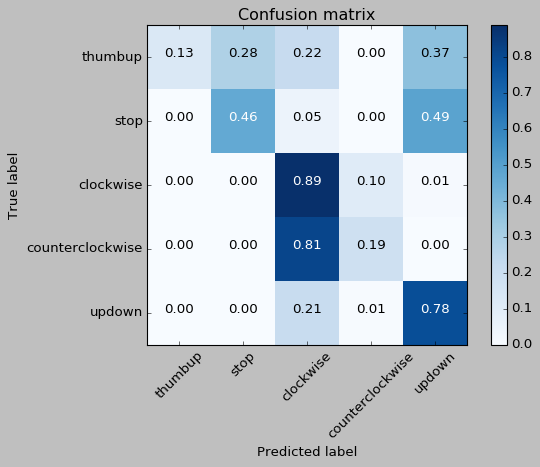

In [52]:
confusion_matrix_plot(met, normalize=True, classes=['thumbup', 'stop', 'clockwise', 'counterclockwise', 'updown'])